**VÍ DỤ VỀ LÀM SẠCH VÀ PHÂN TÍCH TỪ TẬP DỮ LIỆU NÔNG NGHIỆP**
---

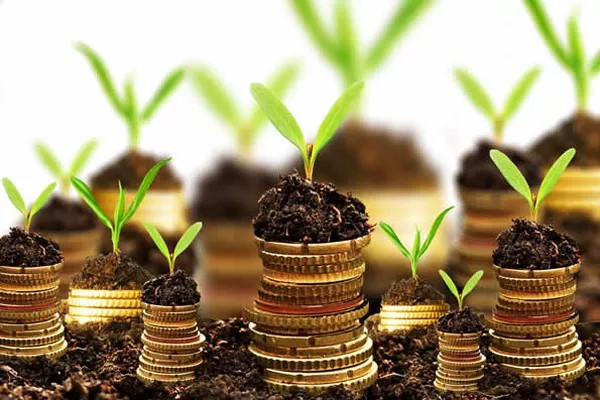

In [ ]:
#Gọi các thư viện sử dụng
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go

In [ ]:
#Mount tới Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1) Mô tả tập dữ liệu
---
Tập dữ liệu agricultural_raw_material.csv lưu trữ dữ liệu về giá của các sản phẩm nông nghiệp và tỷ lệ tăng giá bán, dữ liệu được tính trung bình theo tháng từ tháng 04/1990 --> 04/2020:
1. Coarse wool (Len Thô)
2. Copra (Giá cùi dừa)
3. Cotton (Giá bông)
4. Fine Wool (Giá len mịn)
5. Hard log (Giá gỗ cứng)
6. Hard sawnwood (Giá gỗ xẻ cứng)
7. Hide (da thú)
8. Plywood (Giá ván ép)
9. Rubber (Cao su)
10. Softlog ()
11. Soft sawnwood (Gỗ xẻ mềm)
12. Wood pulp (Bột gỗ)


In [ ]:
path='/content/drive/My Drive/Colab Notebooks/10Project/Data_Analysis/agricultural_raw_material.csv'
data_raw = pd.read_csv(path)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

In [ ]:
data_raw.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,-,549.91,-,100.00,-,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,7.23%,491.88,-10.55%,99.46,-0.54%,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,5.10%,495.39,0.71%,97.90,-1.57%,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,3.46%,485.86,-1.92%,96.75,-1.17%,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,-0.97%,487.52,0.34%,91.89,-5.02%,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


## 2) Chuẩn bị dữ liệu
---
1. Chuẩn hóa dữ liệu thời gian cột Month: 
    * Tách thành hai cột Year (YY) | Month(text)
    * Chuyển Year về năm đầy đủ (YYYY)
    * Chuyển dữ liệu Month từ Text ---> Số
2. Chuẩn hóa dữ liệu tỷ lệ % tăng giá dòng dầu tiên từ '-' về số 0
3. Chuẩn hóa dữ liệu tỷ lệ % tăng giá
    * Bỏ dấu % trong số liệu
    * Bhuyển về dữ liệu float
4. Chuẩn hóa dữ liệu giá bán: trường hợp giá lớn hơn 1000 có dấu , phân cách giữa hàng trăm và hàng nghìn (1,011.45 -- kiểu: object)
    * Bỏ dấu , khỏi chuỗi
    * Chuyển về kiểu dữ liệu float

In [ ]:
#Khai báo dánh sách các tên cột ứng với dữ liệu Price và tỷ lệ % thay đổi giá
#List các columns Price
prices=['Coarse wool Price',
       'Copra Price', 
       'Cotton Price',
       'Fine wool Price',
       'Hard log Price', 
       'Hard sawnwood Price',
       'Hide Price', 
       'Plywood Price', 
       'Rubber Price',
       'Softlog Price', 
       'Soft sawnwood Price', 
       'Wood pulp Price']

#List các columns Percentages
percentages=['Coarse wool price % Change',
            'Copra price % Change', 
            'Cotton price % Change', 
            'Fine wool price % Change',
            'Hard log price % Change', 
            'Hard sawnwood price % Change', 
            'Hide price % change',
            'Plywood price % Change', 
            'Rubber price % Change', 
            'Softlog price % Change',
            'Soft sawnwood price % Change',
            'Wood pulp price % Change']

In [ ]:
# 1) Chuẩn hóa dữ liệu thời gian  cột Month
# Tách thành 2 phần year - month từ cột Month dựa vào ký hiệu -
data_raw["year"] = [int(s.split("-")[1]) for s in data_raw["Month"]]
data_raw["month"] = [str(s.split("-")[0]) for s in data_raw["Month"]]
data_raw.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change,year,month
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,-,549.91,-,100.00,-,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-,90,Apr
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,7.23%,491.88,-10.55%,99.46,-0.54%,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%,90,May
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,5.10%,495.39,0.71%,97.90,-1.57%,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%,90,Jun
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,3.46%,485.86,-1.92%,96.75,-1.17%,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%,90,Jul
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,-0.97%,487.52,0.34%,91.89,-5.02%,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%,90,Aug


In [ ]:
#Year chỉ bao gồm 2 số cuối của năm cần thực hiện
#Chuyển Year về số hàng nghìn 19xx - 20xx (<89)
data_raw['year'] = [2000 + i if i < 89 else 1900 + i for i in data_raw["year"]]
data_raw.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change,year,month
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,-,549.91,-,100.00,-,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-,1990,Apr
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,7.23%,491.88,-10.55%,99.46,-0.54%,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%,1990,May
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,5.10%,495.39,0.71%,97.90,-1.57%,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%,1990,Jun
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,3.46%,485.86,-1.92%,96.75,-1.17%,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%,1990,Jul
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,-0.97%,487.52,0.34%,91.89,-5.02%,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%,1990,Aug


In [ ]:
data_raw.tail(5)

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change,year,month
356,Dec-19,NaN,NaN,NaN,NaN,1.67,1.21%,NaN,NaN,272.80,-0.22%,NaN,NaN,NaN,NaN,500.37,-0.22%,1.66,7.79%,NaN,NaN,NaN,NaN,875.0,0.00%,2019,Dec
357,Jan-20,NaN,NaN,NaN,NaN,1.74,4.19%,NaN,NaN,272.40,-0.15%,NaN,NaN,NaN,NaN,499.64,-0.15%,1.68,1.20%,NaN,NaN,NaN,NaN,875.0,0.00%,2020,Jan
358,Feb-20,NaN,NaN,NaN,NaN,1.69,-2.87%,NaN,NaN,270.56,-0.68%,NaN,NaN,NaN,NaN,496.28,-0.67%,1.61,-4.17%,NaN,NaN,NaN,NaN,875.0,0.00%,2020,Feb
359,Mar-20,NaN,NaN,NaN,NaN,1.49,-11.83%,NaN,NaN,276.93,2.35%,NaN,NaN,NaN,NaN,507.96,2.35%,1.50,-6.83%,NaN,NaN,NaN,NaN,875.0,0.00%,2020,Mar
360,Apr-20,NaN,NaN,NaN,NaN,1.40,-6.04%,NaN,NaN,276.24,-0.25%,NaN,NaN,NaN,NaN,506.68,-0.25%,1.33,-11.33%,NaN,NaN,NaN,NaN,NaN,NaN,2020,Apr


In [ ]:
# Chuyển đổi dữ liệu cột month từ string của các tháng --> số
#Check các 'ký hiệu' tháng khác nhau trong cột month
data_raw['month'].value_counts()

Apr    31
Sep    30
Jun    30
Feb    30
Dec    30
May    30
Oct    30
Nov    30
Aug    30
Jan    30
Jul    30
Mar    30
Name: month, dtype: int64

In [ ]:
#Thực hiện chuyển sang số nguyên ứng với các ký hiệu của từng tháng
mapping = {"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6, "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12}
data_raw["month"] = data_raw["month"].map(mapping).astype("int16")
data_raw.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change,year,month
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,-,549.91,-,100.00,-,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-,1990,4
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,7.23%,491.88,-10.55%,99.46,-0.54%,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%,1990,5
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,5.10%,495.39,0.71%,97.90,-1.57%,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%,1990,6
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,3.46%,485.86,-1.92%,96.75,-1.17%,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%,1990,7
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,-0.97%,487.52,0.34%,91.89,-5.02%,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%,1990,8


In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

In [ ]:
#Cột year dữ liệu năm - cột month dữ liệu tháng
#Tạo ra một một dữ liệu datetime ghép từ Year và Month
data_raw["Date"] = [str(y) + '-' + str(m) for y,m in zip(data_raw["year"], data_raw["month"])]
#chuyển đổi cột Date về dạng DateTime
data_raw['Date']=pd.to_datetime(data_raw["Date"])
data_raw.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change,year,month,Date
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,-,549.91,-,100.00,-,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-,1990,4,1990-04-01
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,7.23%,491.88,-10.55%,99.46,-0.54%,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%,1990,5,1990-05-01
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,5.10%,495.39,0.71%,97.90,-1.57%,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%,1990,6,1990-06-01
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,3.46%,485.86,-1.92%,96.75,-1.17%,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%,1990,7,1990-07-01
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,-0.97%,487.52,0.34%,91.89,-5.02%,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%,1990,8,1990-08-01


In [ ]:
##Xóa các cột dữ thừa không sử dụng và set cột Date thành cột index
data_raw.drop(["Month","year","month"], axis=1,inplace=True)
data_raw.set_index("Date",inplace=True)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 1990-04-01 to 2020-04-01
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Coarse wool Price             327 non-null    object 
 1   Coarse wool price % Change    327 non-null    object 
 2   Copra Price                   339 non-null    object 
 3   Copra price % Change          339 non-null    object 
 4   Cotton Price                  361 non-null    float64
 5   Cotton price % Change         361 non-null    object 
 6   Fine wool Price               327 non-null    object 
 7   Fine wool price % Change      327 non-null    object 
 8   Hard log Price                361 non-null    float64
 9   Hard log price % Change       361 non-null    object 
 10  Hard sawnwood Price           327 non-null    float64
 11  Hard sawnwood price % Change  327 non-null    object 
 12  Hide Price                    327 non-null   

In [ ]:
data_raw.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Date,,,,,,,,,,,,,,,,,,,,,,,,
1990-04-01,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,-,549.91,-,100.00,-,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1990-05-01,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,7.23%,491.88,-10.55%,99.46,-0.54%,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
1990-06-01,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,5.10%,495.39,0.71%,97.90,-1.57%,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
1990-07-01,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,3.46%,485.86,-1.92%,96.75,-1.17%,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
1990-08-01,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,-0.97%,487.52,0.34%,91.89,-5.02%,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [ ]:
#2. Xử lý dữ liệu các cột tỷ lệ thay đổi giá.
#Xử lý dòng dữ liệu đầu tiên của Data_raw
#Thay thế ký hiệu - thành ký tự 0
data_raw = data_raw.replace('-','0')
data_raw.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Date,,,,,,,,,,,,,,,,,,,,,,,,
1990-04-01,482.34,0,236,0,1.83,0,"1,071.63",0,161.20,0,549.91,0,100.00,0,312.36,0,0.84,0,120.66,0,218.76,0,829.29,0
1990-05-01,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,7.23%,491.88,-10.55%,99.46,-0.54%,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
1990-06-01,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,5.10%,495.39,0.71%,97.90,-1.57%,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
1990-07-01,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,3.46%,485.86,-1.92%,96.75,-1.17%,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
1990-08-01,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,-0.97%,487.52,0.34%,91.89,-5.02%,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [ ]:
#3. Loại bỏ ký hiệu % trong số liệu và chuyển sang kiểu dữ liệu float
for i in percentages:
    data_raw[i] = data_raw[i].apply(lambda x: str(x).replace('%',''))
    data_raw[i] = data_raw[i].astype('float')
#Kết quả sau xử lý
data_raw.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Date,,,,,,,,,,,,,,,,,,,,,,,,
1990-04-01,482.34,0.00,236,0.00,1.83,0.00,"1,071.63",0.00,161.20,0.00,549.91,0.00,100.00,0.00,312.36,0.00,0.84,0.00,120.66,0.00,218.76,0.00,829.29,0.00
1990-05-01,447.26,-7.27,234,-0.85,1.89,3.28,"1,057.18",-1.35,172.86,7.23,491.88,-10.55,99.46,-0.54,350.12,12.09,0.85,1.19,124.28,3.00,213.00,-2.63,842.51,1.59
1990-06-01,440.99,-1.40,216,-7.69,1.99,5.29,898.24,-15.03,181.67,5.10,495.39,0.71,97.90,-1.57,373.94,6.80,0.85,0.00,129.45,4.16,200.00,-6.10,831.35,-1.32
1990-07-01,418.44,-5.11,205,-5.09,2.01,1.01,895.83,-0.27,187.96,3.46,485.86,-1.92,96.75,-1.17,378.48,1.21,0.86,1.18,124.23,-4.03,210.05,5.03,798.83,-3.91
1990-08-01,418.44,0.00,198,-3.41,1.79,-10.95,951.22,6.18,186.13,-0.97,487.52,0.34,91.89,-5.02,364.60,-3.67,0.88,2.33,129.70,4.40,208.30,-0.83,818.74,2.49


In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 1990-04-01 to 2020-04-01
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Coarse wool Price             327 non-null    object 
 1   Coarse wool price % Change    327 non-null    float64
 2   Copra Price                   339 non-null    object 
 3   Copra price % Change          339 non-null    float64
 4   Cotton Price                  361 non-null    float64
 5   Cotton price % Change         361 non-null    float64
 6   Fine wool Price               327 non-null    object 
 7   Fine wool price % Change      327 non-null    float64
 8   Hard log Price                361 non-null    float64
 9   Hard log price % Change       361 non-null    float64
 10  Hard sawnwood Price           327 non-null    float64
 11  Hard sawnwood price % Change  327 non-null    float64
 12  Hide Price                    327 non-null   

In [ ]:
# 4. Xử lý dữ liệu có dấu , khi lớn hơn 1000 trong các cột price
for i in prices:
    data_raw[i] = data_raw[i].apply(lambda x: str(x).replace(',',''))
    data_raw[i] = data_raw[i].astype('float')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 1990-04-01 to 2020-04-01
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Coarse wool Price             327 non-null    float64
 1   Coarse wool price % Change    327 non-null    float64
 2   Copra Price                   339 non-null    float64
 3   Copra price % Change          339 non-null    float64
 4   Cotton Price                  361 non-null    float64
 5   Cotton price % Change         361 non-null    float64
 6   Fine wool Price               327 non-null    float64
 7   Fine wool price % Change      327 non-null    float64
 8   Hard log Price                361 non-null    float64
 9   Hard log price % Change       361 non-null    float64
 10  Hard sawnwood Price           327 non-null    float64
 11  Hard sawnwood price % Change  327 non-null    float64
 12  Hide Price                    327 non-null   

In [ ]:
data_raw.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Date,,,,,,,,,,,,,,,,,,,,,,,,
1990-04-01,482.34,0.00,236.0,0.00,1.83,0.00,1071.63,0.00,161.20,0.00,549.91,0.00,100.00,0.00,312.36,0.00,0.84,0.00,120.66,0.00,218.76,0.00,829.29,0.00
1990-05-01,447.26,-7.27,234.0,-0.85,1.89,3.28,1057.18,-1.35,172.86,7.23,491.88,-10.55,99.46,-0.54,350.12,12.09,0.85,1.19,124.28,3.00,213.00,-2.63,842.51,1.59
1990-06-01,440.99,-1.40,216.0,-7.69,1.99,5.29,898.24,-15.03,181.67,5.10,495.39,0.71,97.90,-1.57,373.94,6.80,0.85,0.00,129.45,4.16,200.00,-6.10,831.35,-1.32
1990-07-01,418.44,-5.11,205.0,-5.09,2.01,1.01,895.83,-0.27,187.96,3.46,485.86,-1.92,96.75,-1.17,378.48,1.21,0.86,1.18,124.23,-4.03,210.05,5.03,798.83,-3.91
1990-08-01,418.44,0.00,198.0,-3.41,1.79,-10.95,951.22,6.18,186.13,-0.97,487.52,0.34,91.89,-5.02,364.60,-3.67,0.88,2.33,129.70,4.40,208.30,-0.83,818.74,2.49


In [ ]:
#Lưu Dữ liệu sau khi đã chuẩn hóa dữ liệu thô ra file .CSV
data_raw.to_csv('Data_Agriculture.csv')

# 3) Quan sát các đặc trưng thống kê của tập dữ liêu sau chẩn hóa
---

In [ ]:
#Xem đặc trưng thống kê của tập dữ liệu
data_raw.describe()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,Hard sawnwood Price,Hard sawnwood price % Change,Hide Price,Hide price % change,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
count,327.000000,327.000000,339.000000,339.000000,361.000000,361.000000,327.000000,327.000000,361.000000,361.000000,327.000000,327.000000,327.000000,327.000000,361.000000,361.000000,361.000000,361.000000,327.000000,327.000000,327.000000,327.000000,360.000000,360.000000
mean,626.333731,0.379908,542.023805,0.559912,1.640000,0.075983,850.119572,0.306361,251.034072,0.247147,707.950367,0.127095,78.566667,0.050948,508.216122,0.188532,1.656427,0.403380,164.527462,0.342202,291.061713,0.381315,696.670889,0.089944
std,299.638838,5.269682,269.419179,7.490805,0.513319,5.487211,285.075196,6.707089,65.628406,4.506988,144.563241,3.322609,13.690623,5.711262,89.274718,3.344961,1.017086,7.419312,25.596308,7.223151,34.113959,7.608189,161.156936,3.830608
min,247.090000,-22.250000,182.000000,-19.170000,0.820000,-23.640000,417.470000,-32.840000,133.280000,-14.760000,413.370000,-12.240000,28.590000,-42.140000,312.360000,-11.050000,0.490000,-32.160000,119.350000,-29.120000,183.610000,-41.620000,384.000000,-21.570000
25%,369.620000,-2.715000,372.000000,-3.925000,1.290000,-2.810000,646.345000,-3.450000,197.960000,-1.970000,573.470000,-0.985000,69.495000,-2.035000,442.540000,-1.390000,0.860000,-3.570000,145.970000,-4.005000,277.590000,-3.740000,549.777500,-1.605000
50%,525.070000,-0.080000,458.000000,0.000000,1.600000,0.000000,748.180000,-0.270000,253.010000,-0.030000,728.710000,0.000000,77.250000,0.000000,505.040000,0.000000,1.440000,0.000000,160.370000,-0.300000,294.960000,0.170000,693.580000,0.000000
75%,847.120000,2.945000,714.000000,4.840000,1.850000,2.990000,1019.870000,3.470000,282.970000,2.350000,831.635000,1.380000,86.000000,2.175000,570.790000,1.400000,2.060000,4.440000,180.210000,4.400000,310.865000,3.475000,875.000000,1.845000
max,1391.470000,21.990000,1503.000000,31.820000,5.060000,22.220000,1865.440000,27.070000,520.810000,34.190000,973.600000,21.960000,114.630000,29.240000,751.810000,19.500000,6.260000,24.170000,259.970000,33.210000,372.600000,65.240000,966.490000,12.690000


In [ ]:
#Thông kế và kiểm tra dữ liệu NULL
data_raw.isnull().sum()

Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

# 4) Trực quan hóa các thông số tập dữ liệu
----

### 1) Xây dựng biểu đồ tần suât (Histogram) giá bán các sản phẩm
---
Biểu đồ tần suất cho chúng ta biết bốn vấn đề sau:
1. Giá trị thường xuất hiện nhất (mode)
2. Mức độ thường xuất hiện của mỗi giá trị
3. Hình dạng của phần bố
4. Mối quan hệ giữa dữ liệu và các giới hạn yêu cầu

In [ ]:
#Setup Màu cho các biểu đồ
colors=['#b84949', '#ff6f00', '#ffbb00', '#9dff00', '#329906', '#439c55', '#67c79e', '#00a1db', '#002254', '#5313c2', '#c40fdb', '#e354aa']

In [ ]:
import plotly.express as px
x=0
for i in prices:
    #df = px.data.tips()
    fig = px.histogram(data_raw, x=i, nbins=100, opacity=0.8,
                   color_discrete_sequence=[colors[x]])
    fig.show()
    x+=1

### 2) Trực quan hóa dữ liệu theo dạng chuỗi thời gian
---

In [ ]:
timeseries_plot(data_raw, prices, value_label="price")

#### Biểu đồ giá bán các loại 
---

In [ ]:
# time series plot
def timeseries_plot(df, data_col, value_label="price"):
    df_ = df[data_col]
    fig, ax = plt.subplots(6, 2, figsize=(15, 40))
    plt.subplots_adjust(hspace=0.4)
    for i in range(0,6):
        for j in range(0,2):
            ax[i,j].plot(df_[data_col[i*2+j]].index, df_[data_col[i*2+j]], label="month price")
            ax[i,j].plot(df_[data_col[i*2+j]].rolling(12).mean().index, df_[data_col[i*2+j]].rolling(12).mean(), label="Rolling mean 12 month")
            ax[i,j].set_xlabel("date")
            ax[i,j].set_ylabel("price")
            ax[i,j].set_title(data_col[i*2+j])
            ax[i,j].legend()

    plt.show()   

In [ ]:
import plotly.offline as pyoff
x=0
for i in prices:
    plot_data = [
        go.Scatter(
            x=data_raw.index,
            y=data_raw[i],
            name = str(x) + ')' + i,
            marker = dict(color = colors[x])
            #x_axis="OTI",
            #y_axis="time",
        )
    ]
    plot_layout = go.Layout(
            title=i,
            yaxis_title=i,
            xaxis_title='Month'
        )
    fig = go.Figure(data=plot_data, layout=plot_layout)
    pyoff.iplot(fig)
    x+=1

#### Biểu đồ thay đổi giá
---

In [ ]:
#Biểu đồ thể hiện mức dao động giá
import plotly.graph_objs as go
import plotly.offline as pyoff
x=0
for i in percentages:
    plot_data = [
        go.Scatter(
            x=data_raw.index,
            y=data_raw[i],
            name=i,
            marker = dict(color = colors[x])
        )
    ]
    plot_layout = go.Layout(
            title=i,
            yaxis_title=i,
            xaxis_title='Date'
        )
    fig = go.Figure(data=plot_data, layout=plot_layout)
    pyoff.iplot(fig)
    x+=1

#### Kết hợp trên cùng một biểu đồ
---

In [ ]:
import plotly.offline as pyoff
x=0
plot_data=[]
for i in prices:
    item= go.Scatter(
            x=data_raw.index,
            y=data_raw[i],
            name=i,
            marker = dict(color = colors[x])
        )
    plot_data.append(item)
    x+=1
plot_layout = go.Layout(
        title='Overlapped Prices',
        yaxis_title=i,
        xaxis_title='Date'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


#### Biểu đồ nhiệt, cho biết mối tương quan giữa giá bán của các mặt hàng
---

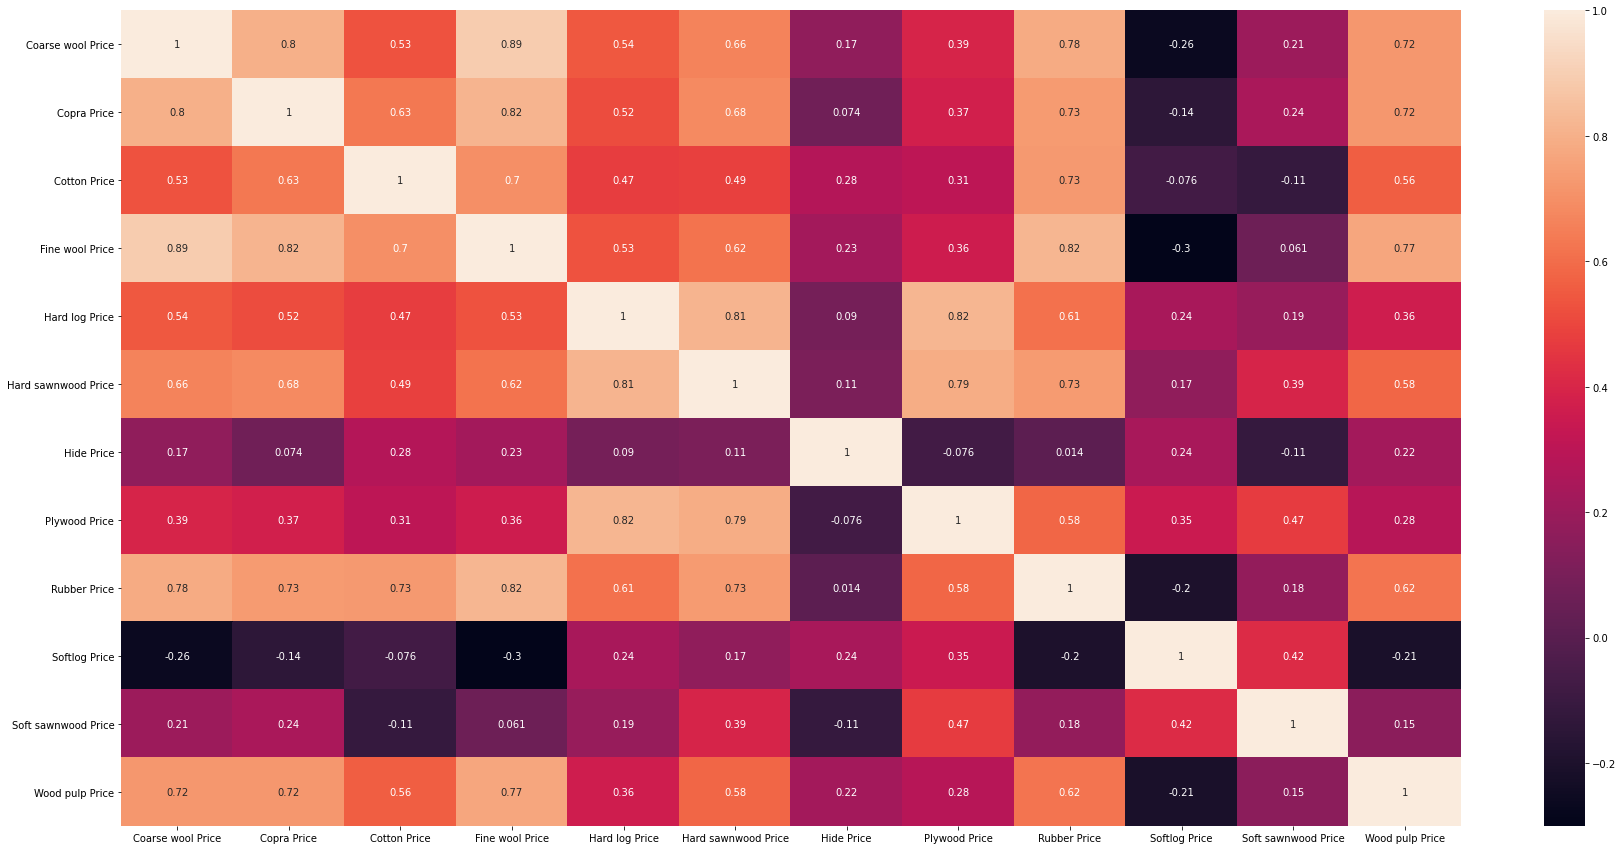

In [ ]:
plt.figure(figsize=(30,15))
data_price = data_raw[prices]
corrMatrix = data_price.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()